## Pyber Analysis and Plot


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
    

In [93]:
c_df = pd.read_csv("Resources/city_data.csv")
c_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [94]:
r_df = pd.read_csv("Resources/ride_data.csv")
r_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [95]:
merged_df = c_df.merge(r_df, how= "inner",  on= "city", indicator  = True)
merged_df.head()

,city,driver_count,type,date,fare,ride_id,_merge
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795,both
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333,both
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736,both
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309,both
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829,both


### Your objective is to build a Bubble Plot that showcases the relationship between four key variables:



-  Average Fare ($) Per City
-  Total Number of Rides Per City
-  Total Number of Drivers Per City
-  City Type (Urban, Suburban, Rural)


#### Define values

In [96]:
average_fare= merged_df.groupby(by="city")["fare"].mean()
total_rides = merged_df.groupby(by= "city")["ride_id"].count()
total_drivers = merged_df.groupby(by="city")["driver_count"].max()
city_type = merged_df.groupby(by="city")["type"].max()

plot_df = average_fare.to_frame()
plot_df.rename(columns={'fare': 'average_fare'},inplace=True)
plot_df["total_rides"] = total_rides
plot_df["total_drivers"] = total_drivers
plot_df["city_type"] = city_type
plot_df.reset_index(level = 0, inplace = True)
plot_df.head()


,city,average_fare,total_rides,total_drivers,city_type
0,Alvarezhaven,23.928710,31,21,Urban
1,Alyssaberg,20.609615,26,67,Urban
2,Anitamouth,37.315556,9,16,Suburban
3,Antoniomouth,23.625000,22,21,Urban
4,Aprilchester,21.981579,19,49,Urban


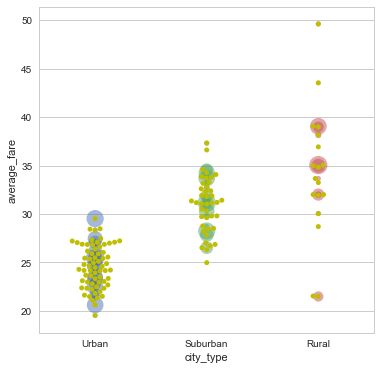

In [180]:
current_palette = sns.color_palette()
# sns.countplot(x=plot_df["city_type"])



sns.stripplot(x=plot_df["city_type"], y = plot_df["average_fare"], s=plot_df["total_drivers"]* .25, alpha=.50)
sns.swarmplot(x=plot_df["city_type"], y= plot_df["average_fare"], color = 'y')


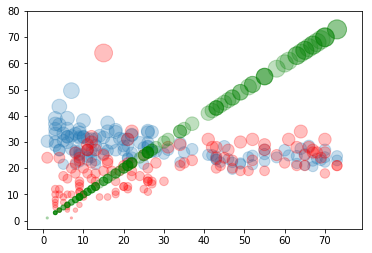

In [87]:
colors
plt.scatter(plot_df["total_drivers"], plot_df["average_fare"], s=plot_df["average_fare"]*5, alpha=0.25)
plt.scatter(plot_df["total_drivers"], plot_df["total_rides"], s=plot_df["total_rides"]*5, alpha=0.25, color="r")
plt.scatter(plot_df["total_drivers"], plot_df["total_drivers"], s=plot_df["total_drivers"]*5, alpha=0.25, color='g')

plt.show()






In [84]:
sns.set(style="whitegrid", color_codes=True)
fare = sns.load_dataset("average_fare")
rides = sns.load_dataset("total_rides")
drivers = sns.load_dataset("total_drivers")
type = sns.load_dataset("city_type")


NameError: name 'sns' is not defined

### In addition, you will be expected to produce the following three pie charts:


-  % of Total Fares by City Type
-  % of Total Rides by City Type
-  % of Total Drivers by City Type


